In [3]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
len(df)*0.75

1095.0

In [6]:
train = df.sample(frac=0.75, random_state=1)
test = df.drop(train.index)

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
258,259,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,231500
267,268,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
288,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
649,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,84500
1233,1234,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,COD,Abnorml,142000


In [8]:
len(train), len(test)

(1095, 365)

In [9]:
train['SalePrice'].mean()

180327.24200913243

In [10]:
target = 'SalePrice'
y_train = train[target]
y_test = test[target]

In [11]:
predict = y_train.mean()

In [12]:
predict

180327.24200913243

In [13]:
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train) # 리스트 * 숫자 하면 리스트 n개
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러 : {mae:.2f}')

훈련 에러 : 57775.57


In [14]:
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'훈련 에러 : {mae:.2f}')

훈련 에러 : 55862.90


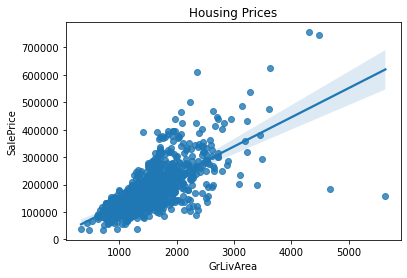

In [15]:
import seaborn as sns
sns.regplot(x=train['GrLivArea'], y=train['SalePrice']).set_title('Housing Prices');

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features = ['GrLivArea']
X_train = train[features]
X_test = test[features]

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러 : {mae:.2f}')

훈련 에러 : 38327.78


C:\Users\jsm88\AppData\Local\Temp/ipykernel_8496/1831837556.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


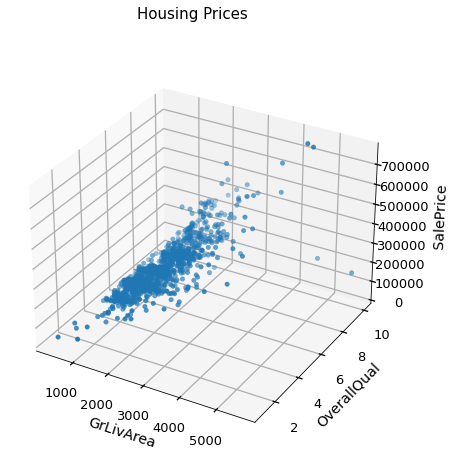

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(train['GrLivArea'], train['OverallQual'], train['SalePrice'])
ax.set_xlabel('GrLivArea', labelpad=12)
ax.set_ylabel('OverallQual', labelpad=10)
ax.set_zlabel('SalePrice', labelpad=20)

plt.suptitle('Housing Prices', fontsize=15)
plt.show()

In [18]:
pip install plotly --upgrade

In [19]:
# import plotly.plotly as px
# px.scatter_3d(
#     train,
#     x='GrLivArea',
#     y='OverallQual',
#     z='SalePrice',
#     title='House Prices'
# )

In [20]:
features = ['GrLivArea', 'OverallQual']
X_train = train[features]
X_test = test[features]

In [21]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러 : {mae:.2f}')

훈련 에러 : 29129.58


In [22]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러 : {mae:.2f}')

테스트 에러 : 27598.31


In [41]:
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import itertools

def surface_3d(df, f1, f2, target, length=20, **kwargs):
    plot = px.scatter_3d(df, x=f1, y=f2, z=target, opacity=0.5, **kwargs)
    model = LinearRegression()
    model.fit(df[[f1, f2]], df[target])
    
    x_axis = np.linspace(df[f1].min(), df[f1].max(), length)
    y_axis = np.linspace(df[f2].min(), df[f2].max(), length)
    coords = list(itertools.product(x_axis, y_axis))
    
    pred = model.predict(coords)
    z_axis = pred.reshape(length, length).T
    
    plot.add_trace(go.Surface(x=x_axis, y=y_axis, z=z_axis, colorscale='Viridis'))
    
    return plot

In [42]:
surface_3d(
    train,
    f1='GrLivArea',
    f2='OverallQual',
    target='SalePrice',
    title='House Prices'
)

In [25]:
model.intercept_, model.coef_

(-102743.02342270719, array([   54.40145532, 33059.44199506]))

In [26]:
b0 = model.intercept_
b1, b2 = model.coef_

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

y = -102743 + 54x₁ + 33059x₂


In [27]:
model.predict([[2000,10]])

array([336654.30716253])

In [28]:
model.predict([[2000,3]])

array([105238.21319714])

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df_study = pd.DataFrame([[1,2,3],[2,1,3],[3,3,6],[4,5,9],[4,4,8],[5,5,10],[7,7,14],[9,8,17],[10,9,19],[10,10,20]])
df_study.columns = ['Q1','Q2','Total']

In [30]:
df_study

,Q1,Q2,Total
0,1,2,3
1,2,1,3
2,3,3,6
3,4,5,9
4,4,4,8
5,5,5,10
6,7,7,14
7,9,8,17
8,10,9,19
9,10,10,20


In [31]:
from IPython.display import display
from matplotlib.patches import Rectangle

def evaluation_metrics(df, feature, target, slope, intercept):
    
    x = df[feature]
    y = df[target]
    
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    y_pred = slope * x + intercept
    
    ax.plot(x, y_pred)
    
    # Plot 제곱오차(MSE)
    x_left, x_right = ax.get_xlim() # x-axis view limits
    y_bottom, y_top = ax.get_ylim()
    scale = (x_right - x_left) / (y_top - y_bottom)

    for f, t, p in zip(x, y, y_pred):
        xy = (f, min(t, p))
        h = abs(t - p)
        w_scaled = h * scale
        ax.add_patch(Rectangle(xy=xy, width=w_scaled, height=h, alpha=0.2))
    
    # 회귀방정식 평가지표
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y, y_pred)

    display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,35.690000
1,MAE,5.280000
2,RMSE,5.974111
3,R2,0.000000


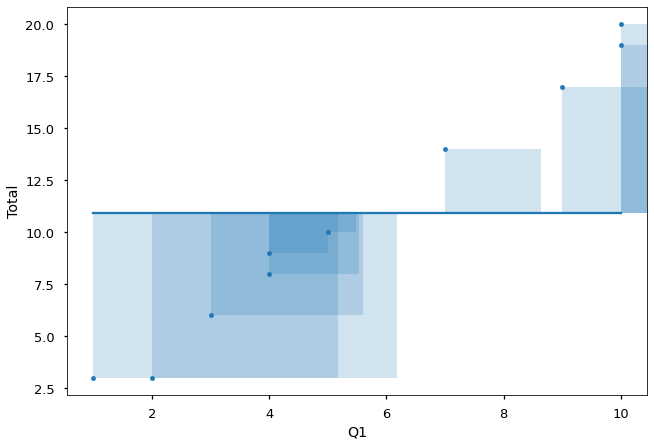

In [32]:
evaluation_metrics(df_study, 'Q1', 'Total', 0, df_study['Total'].mean())

,Metric,Score
0,MSE,8.400000
1,MAE,2.400000
2,RMSE,2.898275
3,R2,0.764640


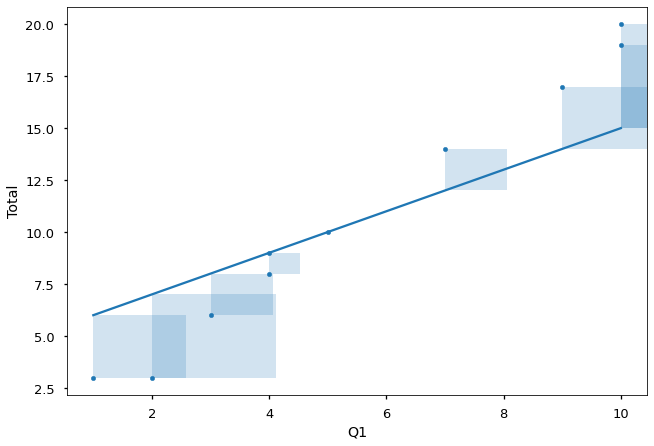

In [33]:
evaluation_metrics(df_study, 'Q1', 'Total', 1, 5)

,Metric,Score
0,MSE,0.500000
1,MAE,0.500000
2,RMSE,0.707107
3,R2,0.985990


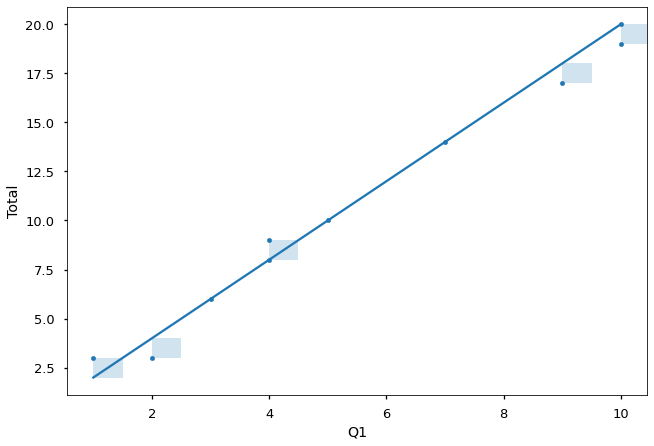

In [34]:
evaluation_metrics(df_study, 'Q1', 'Total', 2, 0)

In [35]:
import plotly.express as px
px.scatter(
    df_study,
    x='Q1',
    y='Total',
    trendline = 'ols'
)

c:\Users\jsm88\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\jsm88\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [36]:
rng = np.random.RandomState(1)
data = np.dot(rng.rand(2,2), rng.randn(2,30)).T
X = pd.DataFrame([i[0] for i in data])
y = pd.DataFrame([i[1] for i in data])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
X1 = np.arange(6).reshape(3,2)
print(X1)

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X1)

[[0 1]
 [2 3]
 [4 5]]


In [39]:
X_poly

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Degree=1


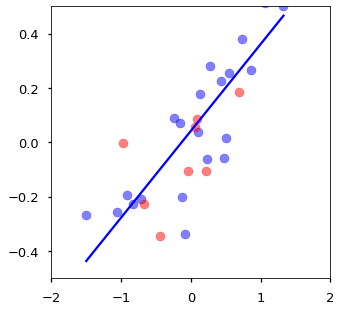

Degree=3


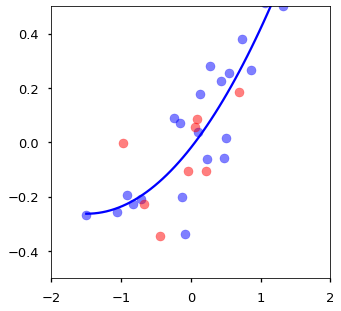

Degree=4


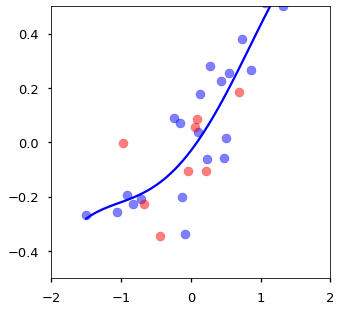

Degree=6


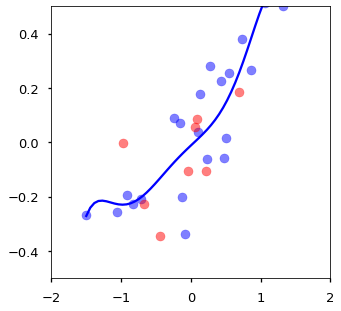

Degree=10


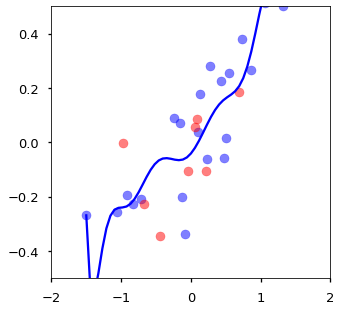

Degree=20


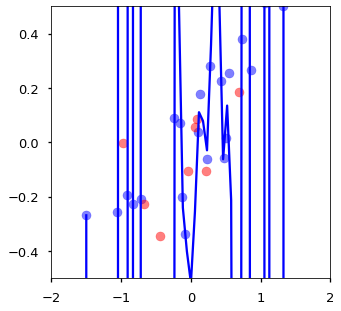

In [40]:
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5,5)

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
    
polynomial_degrees = [1,3,4,6,10,20]
train_r2s = []
test_r2s = []

for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    print(f'Degree={degree}')
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    display(HTML(f'<b style="color: blue">train R2 {train_r2:.2f}</b>'))
    display(HTML(f'<b style="color: red">test R2 {test_r2:.2f}</b>'))

    plt.scatter(X_train, y_train, color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, color='red', alpha=0.5)
    

    x_domain = np.linspace(X.min(), X.max())
    curve = model.predict(x_domain)
    plt.plot(x_domain, curve, color='blue')
    plt.axis([-2., 2.0, -0.5, 0.5])
    plt.show()
    display(HTML('<hr/>'))
    
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)